In this ptoject i have used bit slice plane to embedding a massage (here i have used my student ID as a specific image) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tqdm.notebook import tqdm
import cv2

I have used MNIST Dataset to extract those numbers that i want. 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
The size of training dataset is:  (60000, 28, 28)
The size of testing dataset is:  (10000, 28, 28)


For example, I need the number '9', so I will choose a picture from the training dataset with the label '9'. But there are many pictures with this label so I chose one of that pictures randomly 

In [3]:
import random
def number_to_image(input_number):
  input_num_picture = []
  for i in tqdm(range(len(y_test))):
    if (input_number == y_test[i]):
      input_num_picture.append(i)
  img_num = random.choice(input_num_picture)
  return X_test[img_num]*255

Since my student ID has eight digits, I did the above algorithm for each digit

In [23]:
first_digit   = number_to_image(9).astype('uint8')
second_digit  = number_to_image(7).astype('uint8')
third_digit   = number_to_image(4).astype('uint8')
fourth_digit  = number_to_image(1).astype('uint8')
fifth_digit   = number_to_image(1).astype('uint8')
sixth_digit   = number_to_image(2).astype('uint8')
seventh_digit = number_to_image(3).astype('uint8')
eighth_digit  = number_to_image(4).astype('uint8')

digits_lst = [first_digit, second_digit, third_digit, fourth_digit, fifth_digit, sixth_digit, seventh_digit, eighth_digit]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Now I need to do thresholding on each image, so that pixel values of each become '0' or '1'.

In [24]:
segmented_images = []
for i in digits_lst:
  ret, thresh = cv2.threshold(i , 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  regions = np.digitize(i , bins=np.array([ret]))
  segmented_images.append(regions)

Now I need to multiple each image by 2^n ( 0<n<8).
Finally, those images should add up to each other  

In [25]:
plane_1 = segmented_images[0]*128
plane_2 = segmented_images[1]*64
plane_3 = segmented_images[2]*32
plane_4 = segmented_images[3]*16
plane_5 = segmented_images[4]*8
plane_6 = segmented_images[5]*4
plane_7 = segmented_images[6]*2
plane_8 = segmented_images[7]*1

main_img = plane_1 + plane_2 + plane_3 + plane_4 + plane_5 + plane_6 + plane_7 + plane_8 

Here is the finall result.

(-0.5, 27.5, 27.5, -0.5)

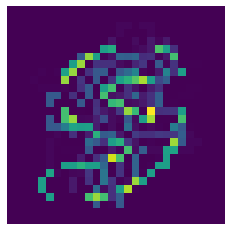

In [30]:
plt.imshow(main_img)
plt.axis('off')

Now we shall do a bit-plane slicing to check our result.

In [27]:
lst = []
for i in range(main_img.shape[0]):
  for j in range(main_img.shape[1]):
    lst.append(np.binary_repr(main_img[i][j] , width=8))

In [28]:
eight_bit = (np.array([np.bitwise_and(int(i, 2) , 128) for i in lst])).reshape(main_img.shape[0] , main_img.shape[1])
seven_bit = (np.array([np.bitwise_and(int(i, 2) , 64)  for i in lst])).reshape(main_img.shape[0] , main_img.shape[1])
six_bit   = (np.array([np.bitwise_and(int(i, 2) , 32)  for i in lst])).reshape(main_img.shape[0] , main_img.shape[1])
five_bit  = (np.array([np.bitwise_and(int(i, 2) , 16)  for i in lst])).reshape(main_img.shape[0] , main_img.shape[1])
four_bit  = (np.array([np.bitwise_and(int(i, 2) , 8)   for i in lst])).reshape(main_img.shape[0] , main_img.shape[1])
three_bit = (np.array([np.bitwise_and(int(i, 2) , 4)   for i in lst])).reshape(main_img.shape[0] , main_img.shape[1])
two_bit   = (np.array([np.bitwise_and(int(i, 2) , 2)   for i in lst])).reshape(main_img.shape[0] , main_img.shape[1])
one_bit   = (np.array([np.bitwise_and(int(i, 2) , 1)   for i in lst])).reshape(main_img.shape[0] , main_img.shape[1])

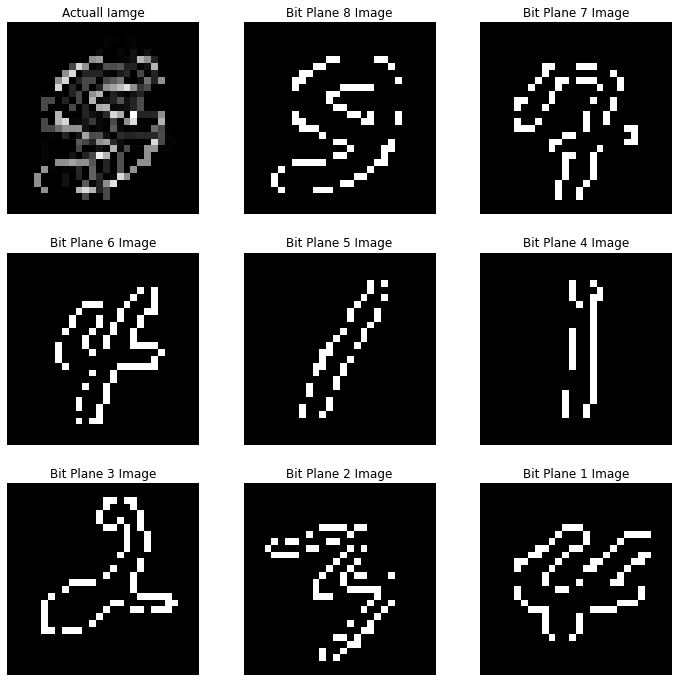

In [31]:
img_lst_r = [main_img , eight_bit, seven_bit, six_bit ,five_bit , four_bit, three_bit ,two_bit , one_bit]
fig, ax = plt.subplots(ncols = 3 , nrows = 3 ,figsize=(12 ,12))
for i in range(9):
  ax[i//3][i%3].imshow(img_lst_r[i], cmap= 'gray')
  ax[i//3][i%3].axis('off')
  if (i != 0):
    ax[i//3][i%3].set_title(f"Bit Plane {9 - i} Image")
  if (i == 0):
    ax[i//3][i%3].set_title("Actuall Iamge")